In [1]:
import Inference
import Filter
import rrrc_cpp

(2000, 2000)

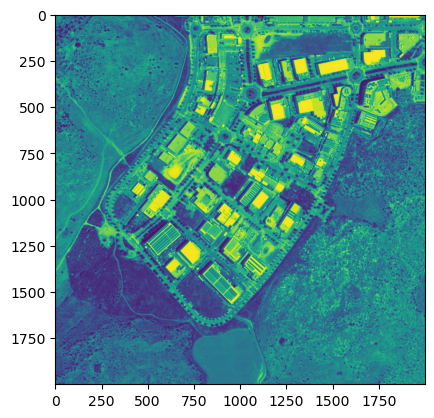

In [2]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/home/artl2sch/Desktop/Robotic_Perception/C++/FastCropRotate/0-0.png")

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img = cv2.resize(img, [2000, 2000])

plt.imshow(img)

img.shape

In [3]:
import torch

out_n = 250

with torch.no_grad():    

    input_image  =  torch.tensor(img, dtype = torch.uint8)[None, :, :].contiguous().cuda()
    output_images = torch.zeros([out_n, 1, 128, 128], dtype = torch.float32).contiguous().cuda()

    M = torch.tensor([1.0, 0.0, 0.0, 1.0]*out_n, dtype = torch.float32)
    M_rand = torch.rand_like(M)
    M += M_rand * 0.5

    M *= input_image.shape[-1]/output_images.shape[-1]
    T = torch.tensor([0.0, 0.0]*out_n, dtype = torch.float32)

In [4]:
ONNX_FILE_PATH = './Weights/model.onnx'
with torch.no_grad():    
    trt_model = Inference.TRTModel(out_n, ONNX_FILE_PATH)
    trt_model.build_engine()
    trt_model.reserve_cuda_memory()

[06/30/2023-04:04:24] [TRT] [W] CUDA lazy loading is not enabled. Enabling it can significantly reduce device memory usage and speed up TensorRT initialization. See "Lazy Loading" section of CUDA documentation https://docs.nvidia.com/cuda/cuda-c-programming-guide/index.html#lazy-loading
[06/30/2023-04:05:02] [TRT] [W] TensorRT encountered issues when converting weights between types and that could affect accuracy.
[06/30/2023-04:05:02] [TRT] [W] If this is not the desired behavior, please modify the weights or retrain with regularization to adjust the magnitude of the weights.
[06/30/2023-04:05:02] [TRT] [W] Check verbose logs for the list of affected weights.
[06/30/2023-04:05:02] [TRT] [W] - 24 weights are affected by this issue: Detected subnormal FP16 values.
[06/30/2023-04:05:02] [TRT] [W] - 10 weights are affected by this issue: Detected values less than smallest positive FP16 subnormal value and converted them to the FP16 minimum subnormalized value.
[06/30/2023-04:05:02] [TRT] 

In [41]:
with torch.no_grad():
    pf = Filter.ParticleFilter(out_n)
    displacement_val = torch.tensor([0.1, 0.0, 0.0, 0.0], dtype = torch.float32).cuda()
    displacement_var = torch.tensor([0.0, 0.0, 0.0, 0.1], dtype = torch.float32).cuda()

In [42]:
n_steps = 100

for i in range(n_steps):
    with torch.no_grad():    

        #rrrc_cpp.rrrc(input_image, output_images, M, T)

        #output_images_3 = output_images.repeat(1, 3, 1, 1)
  
        #embeddings = trt_model.run(output_images_3)

        #pf.resample(embeddings)

        pf.move(displacement_val, displacement_var)




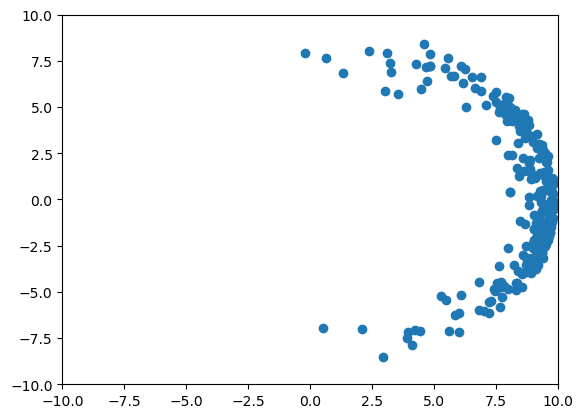

In [43]:
pf.draw_particles()
#pf.print_times()